### Preliminaries

#### Definition

Given the dataset $(X, y)$ of size $n \in \mathbb{N}$ having $K \in \mathbb{N}$ variables, where $X \in \mathbb{R}^{n \times K}$ and $y \in \mathbb{R}^n$. 

Suppose that there exists a function $f: \mathbb{R}^{1 \times K} \rightarrow \mathbb{R}, x_n \rightarrow y_n$ ($x_n \in \mathbb{R}^{1 \times K}$ and $y_n \in \mathbb{R}$). Regression tasks require us to approximate this function $f$ using the provided dataset.

Suppose $y_n$ is linearly dependent on $x_n$. We therefore assume that $f$ is a linear function. Hence it will have a form of 
$$
    y_n = f(x_n) =\beta_0 + x_n \beta \in \mathbb{R}
$$
where $\beta \in \mathbb{R}^K$ and $\beta_0 \in \mathbb{R}$.

Our objective is to approximate $f$ so that $x_n \beta$ is closed to $y_n$ as much as posible. In the other words, we are going to minize the Sum-of-Square Error Function:
$$
    E(X, y, \beta) = \frac{1}{2}\sum_{i=1}^n{(y_n - f(x_n))^2} = \frac{1}{2}\sum_{i=1}^n{(y_n - x_n \beta)^2} = \frac{1}{2} ||y - \beta X||^2
$$
The term $\frac{1}{2}$ is prefixed for later convenience in derivative computation.

The linear function $f$ is depent on the parameter $\beta$. So we can reformulate the problem as:
$$
    \beta* = argmin_{\beta}(E(X, y, \beta))
$$

#### Ordinary Least Square Estimator
Given a linear regression model under the following form:

$$
    y = X\beta + \varepsilon = \sum_{i=1}^D \beta_i x_i + \varepsilon
$$

The estimator for this linear regression model having the form

$$
    \hat{\beta} = (X^TX)^{-1} X^Ty
$$

is called the **Ordinary Least Square** (OLS) estimator for the above linear regression model.

According to Gauss-Markov theorem, OLS estimator has the lowest *sampling variance* (see below) among estimators in the class of *linear unbiased estimator* (see below) given the two following assumptions:
- The errors in the linear regression model are uncorrelated.
- The errors in the linear regression model all have zero expectation and equal variances.

Formally, given a regression function $y_i = x_i\beta + \varepsilon_i$ where $(\varepsilon_i)_i$ is the sequence of errores, we restate the two assumptions as:
- $\forall (i, j)$ that $i \neq j$, $Cov(\varepsilon_i, \varepsilon_j) = 0$.
- $\forall i$, $\mathbb{E}[\varepsilon_i] = 0$ and $Var(\varepsilon_i) = \sigma^2 < +\infty$. 


#### Bias of an Estimator

the bias of an estimator is the difference between the expected value of the paremater of that estimator and the true value of the parameter being estimated. An estimator is called **unbiased** if its bias is zero. In other case, it is called **bias estimator**.

Formally, suppose we have a statistical model $P_{\theta}(x) = P(x | \theta)$ parameterized by $\theta$. Let $\hat{\theta}$ be the estimator of $\theta$. Then the *bias* of $\hat{\theta}$ relative to $\theta$ is defined as
$$
    Bias(\hat{\theta}, \theta) = Bias_{}(\hat{\theta}, \theta) = \mathbb{E}_{x | \theta} [\hat{\theta}] - \theta = \mathbb{E}_{x | \theta} [\hat{\theta} - \theta]
$$
where $\mathbb{E}_{x | \theta}$ denotes expected value over the distribution $P(x | \theta)$: 
$$
    \mathbb{E}_{x | \theta}[\hat{\theta}] = \int \hat{\theta} P(x | \theta) dX = \int (x^Tx)^{-1}(x^Ty) P(x | \theta) dx
$$.

#### Proof that OLS is a Linear Unbiased Estimator

First, we have to show that $\hat{\beta} = (X^T X)^{-1} X^T y$ is an estimator of the given linear regression model.

Indeed, we have

\begin{align}
    E(X, y, \beta)  & = ||y - X\beta||^2 \\
                    & = (y - X \beta)^T (y - X \beta) \\
                    & = (y^T y - \beta^T X^T y - y^T X\beta + \beta^T X^T X\beta)
\end{align}

Then

\begin{align}
    \frac{dE(X, y, \beta)}{d\beta}  & = \frac{d}{d\beta}(y^T y - \beta^T X^T y - y^T X\beta + \beta^T X^T X\beta) \\
                                    & = -2X^T y + 2X^T X\beta \\
\end{align}

So

\begin{align}
    & & \frac{dE(X, y, \beta)}{d\beta} & = & 0 \\
    & \Leftrightarrow & -2X^T y + 2X^T X\beta & = & 0 \\
    & \Leftrightarrow &  X^T X\beta & = & X^T y \\
    & \Leftrightarrow &  \beta & = & (X^T X)^{-1}X^T y \\
\end{align}
with the assumption that $rank(X) = K$ so that $X^T X$ is invertible.

To this end, we can see that

\begin{align}
    \mathbb{E}[\hat{\beta}] & = \mathbb{E}[(X^T X)^{-1}X^T y] \\
                            & = \mathbb{E}[(X^T X)^{-1}X^T (X\beta + \varepsilon)] \\
                            & = \mathbb{E}[(X^T X)^{-1}X^T X\beta + (X^T X)^{-1}X^T \varepsilon] \\
                            & = \mathbb{E}[\beta + (X^T X)^{-1}X^T \varepsilon] \\
                            & = \beta + \mathbb{E}[(X^T X)^{-1}X^T \varepsilon] \\
                            & = \beta + (X^T X)^{-1}X^T \mathbb{E}[\varepsilon] \\
                            & = \beta \\
\end{align}
hence $Bias(\hat{\theta}, \theta) = 0$.

#### Proof that OLS is a Best Linear Unbiased Estimator (BLEU)

To show that OLS estimator is the best linear unbiased estimator for the linear regression model, let $\tilde{\beta} = ((X^T X)^{-1} X^T + D)y$ is another linear estimation where $D \in \mathbb{R^{K \times n}}$ is a non-zero matrix, we will show that such estimator can not have smaller variance than those of $\beta$.

We have:

\begin{align}
    \mathbb{E}[\tilde{\beta}]   & = \mathbb{E}[((X^T X)^{-1} X^T + D)y] \\
                                & = \mathbb{E}[((X^T X)^{-1} X^T + D)(X \beta + \epsilon)] \\
                                & = ((X^T X)^{-1} X^T + D)X \beta + ((X^T X)^{-1} X^T + D)\mathbb{E}[\varepsilon] \\
                                & = ((X^T X)^{-1} X^T + D)X \beta & (\mathbb{E}[\varepsilon] = 0) \\
                                & = (X^T X)^{-1} X^T X \beta + D X \beta \\
                                & = (I_K + DX) \beta
\end{align}

As $\hat{\beta}$ is unbiased ($\mathbb{E}[\hat{\beta}] = \beta$), we must have $DX = 0$ or $D = 0$.

Moreover, to see that $\hat{\beta}$ is an estimator that has the minimum variance, let:

\begin{align}
    Var(l^T \tilde{\beta})  & = l^T Var(\tilde{\beta})l \\
                            & = l^T (\sigma^2 (X^T X)^{-1}) l + l^T DD^T l \\
                            & = \sigma^2 l^T (X^T X)^{-1} l + l^T DD^T l \\
                            & = Var(l^T \hat{\beta}) + (D^T l)^T (D^T l) \\
                            & = Var(l^T \hat{\beta}) + || D^T l || \ge Var(l^t \hat{\beta})
\end{align}

Equatily holds if and ony if (iif) $D^T l = 0$. In this case, we have:

\begin{align}
    l^T \tilde{\beta}  & = l^T (((X^T X)^{-1} X^T + D)y) \\
                            & = l^T (X^T X)^{-1} X^T y + l^T Dy \\
                            & = l^T \hat{\beta} + (D^T l)^T y \\
                            & = l^T \hat{\beta}
\end{align}

This proves the uniqueless of the OLS estimator as the BLEU.

#### Overfitting and Regularization

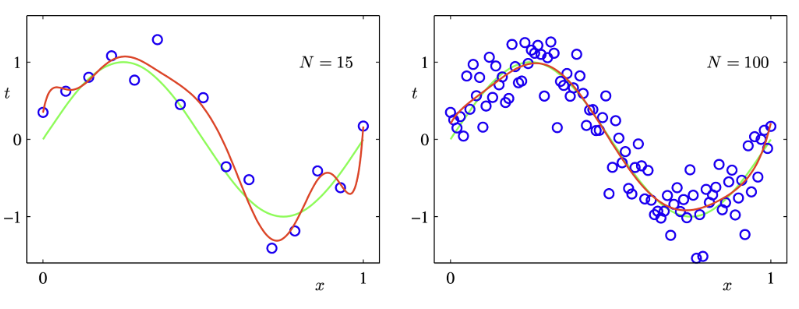

When there is a small number of data points ($n$) but we have a large amount of variables ($K$) (that is $n << K$) then the overfitting of regression models has high change to occur. There are two ways to tackle this problem:
- Collecting more data: more data results in more constraints in the error function $E(X, y, \beta)$ hence limit the change of overfitting (see the above figure).
- Adding the regularization terms (usually the regular term $\beta^T\beta$) in the objective function.

The following sections will discuss the second case where the motivations of why regularization terms are drawn.

#### Linear Regression model from the Maximum Likelihood (ML) approach

Let assume that the noise introduced in the regression model (generally) $\varepsilon \sim \mathcal{N}(0, \theta^{-1})$. As we have

$$
    y = f(x, \beta) + \varepsilon
$$

given $x \in \mathbb{R}^K$ and $y \in \mathbb{R}$ , so we have

$$
    P(y | x, \beta, \theta) \sim \mathcal{N}(y | f(x, \beta), \theta^{-1})
$$

where $\beta$ is the parameters of the function $f$.

Given the dataset $(X, T)$ where $X = (x_1, x_2, ..., x_n)^T \in \mathbb{R}^{n \times K}$ and $T = (t_1, t_2, ..., t_n)^T \in \mathbb{R}^n$, we have:

$$
    P(T | X, \theta, \beta) = \prod_{i=1}^{n} P(t_i | f(x_i, \beta)) = \prod_{i=1}^{n} \mathcal{N}(t_i | f(x_i, \beta), \theta^{-1})
$$

For the ease of later calculation, let turn these formulas into logarithmic space:

\begin{align}
    ln P(T | X, \theta, \beta)  & = \sum_{i=1}^{n} ln \mathcal{N}(t_i | f(x_i, \beta), \theta^{-1}) \\
                                & = -\frac{\theta}{2} \sum_{i=1}^{n} (t_n - f(x_n, \beta))^2 + \frac{n}{2} ln\theta - \frac{N}{2}ln 2\pi \\
                                & = -\theta E(X, T, \beta) + const
\end{align}

Our target is to find the set of $(\beta, \theta)$ so that the likelihood $P(T | X, \theta, \beta)$ reaches its maximum capility on the dataset $(X, T)$. As the $ln$ is a monotonic increasing function on $\mathbb{R}$, **maximizing that likelihood is equavalent to minimizing the log likelihood**. Moreover, **finding the optimized parameter $\beta$ of the regression model (in general) using the Sum-of-Square Error Function implies maximizing the likelihood with assumption of Gaussian distribution of the noise with fixed $\theta$ parameter**.

#### Linear Regression model from the Maximum A Posterior (MAP) approach

The Maximum Likelihood approach assumes the $\theta$ parameter of noise is fixed to determine the optimized parameter of the regression model. Such approach is called the **point estimation**. To comprehensively describe the variability of the parameter $\beta$ of regression model, we apply the Bayesian rule to have

$$
    P(\beta | X, T, \alpha, \theta) \propto P(T | X, \theta, \beta) P(\beta | \alpha)
$$
where $P(\beta | \alpha)$ is the prior distribution of the $\beta$ parameter, $P(\beta | X, T, \alpha, \theta)$ is the posterior distribution of $\theta$ parameter, and $P(T | X, \theta, \beta)$ is the likelihood distribution of the $\theta$ parameter.

To this end, let
$$
    P(\beta | \alpha) = \mathcal{N} (\beta | 0, \alpha^{-1}I_K) = \left(\frac{\alpha}{2\pi}\right)^{\frac{K+1}{2}} exp\left(-\frac{\alpha}{2} \beta^T \beta\right)
$$
where $\alpha$ is the hyperparameter, and
$$
    P(T | X, \theta, \beta) = \mathcal{N}(T | f(X, \beta), \beta^{-1})
$$

Let turn these probabilities into the logarithmic space for later convenience in computation, we have:

$$
    ln P(\beta | \alpha) = \frac{K+1}{2}ln\frac{\alpha}{2\pi} - \frac{\alpha}{2} \beta^T\beta
$$

and

\begin{align}
    ln P(T | X, \theta, \beta)  & = \sum_{i=1}^{n} ln \mathcal{N}(t_i | f(x_i, \beta), \theta^{-1}) \\
                                & = -\frac{\theta}{2} \sum_{i=1}^{n} (t_n - f(x_n, \beta))^2 + \frac{n}{2} ln\theta - \frac{N}{2}ln 2\pi
\end{align}

Hence we have:

\begin{align}
    ln P(\beta | X, T, \alpha, \theta)  & = \frac{K+1}{2}ln\frac{\alpha}{2\pi} - \frac{\alpha}{2} \beta^T\beta - \frac{\theta}{2} \sum_{i=1}^{n} (t_n - f(x_n, \beta))^2 + \frac{n}{2} ln\theta - \frac{N}{2}ln 2\pi \\
                                        & = - \frac{\theta}{2} \sum_{i=1}^{n} (t_n - f(x_n, \beta))^2 - \frac{\alpha}{2} \beta^T\beta  + const \\
                                        & = -\theta E(X, T, \beta) - \frac{\alpha}{2} \beta^T\beta + const
\end{align}
where $const$ indicates terms that are not relevant to the $\beta$ parameter.

**This implies that minimizing objective function $E(X, T, \beta)$ using the regularization term $\beta^T\beta$ is equavalent to Maximizing a Posterion with the assumption of Gaussian distribution of the likelihood and prior distribution.**

### Assignment 1 (3 scores):

- Use the Numpy library only to construct the Linear Regression model.
- Train and Evaluate that Linear Regression model on the [Forest Fires](https://archive.ics.uci.edu/static/public/162/forest+fires.zip) dataset.

### Assignment 2 (3 scores):

- Standardize the data so that their mean is $0$ and their variance is $1$.
- Compare the results of Linear Regression model when being trained on the original and standardized data.

#### Data normalization

The OLS estimator of a linear regression model has the form

$$
    \hat{\beta} = (X^T X)^{-1} X^T y
$$
where $X^T X \in \mathbb{R}^{K \times K}$ is called the normal matrix of the **Gram Matrix**.

Considering the convariance of $X$, we have

\begin{align}
    Cov(X)  & = \mathbb{E}[(X - \mathbb{E}[X])^2] \\
            & = \mathbb{E}[X^T X - 2 X^T\mathbb{E}[X] + \mathbb{E}[X]^T \mathbb{E}[X]] \\
            & = \mathbb{E}[X^T X] - 2 \mathbb{E}[X^T\mathbb{E}[X]] + \mathbb{E}[X]^T \mathbb{E}[X] \\
            & = \mathbb{E}[X^T X] - 2 \mathbb{E}[X]^T\mathbb{E}[X] + \mathbb{E}[X]^T \mathbb{E}[X] \\
            & = \mathbb{E}[X^T X] - \mathbb{E}[X]^T \mathbb{E}[X] \\
\end{align}

In case we have $\mathbb{E}[X] = 0$, then $X^T X = Cov(X)$. The normalization helps we to have the numerical stability of the input, theoretically leads to stable calculation when being applied to unseen data.

### Assignment 3 (2 scores):

- Perform feature engineering to remove columns that are linearly dependent (colinear) with other columns in the dataset.
- Evaluate the Linear Regression model when beeing trained on the original data and preprocessed data.

#### On the Problem of Colinearity

As stated previously, the OLS of the linear regression model is achieved by assuming that $rank(X) = K$ or $det(X) \ne 0$. So that removing columns in $X$ having colinearity with other columns is to ensure that assumption of the full rank condition of $X$. In the case $det(X) = 0$, then the **Moore-Penrose inverse** will be applied to determine the pseudo-inverse matrix of $X^T X$.

### Assignment 4 (2 scores):

- Implement the Linear Regression model using Machine Learning libraries (Scikit Learn or SKorch).
- Compare the results of Linear Regression model constructed manually and from Machine Learning libraries.